In [2]:
import numpy as np
from Huffman_Code import HuffmanShaping, GeometricHuffmanCode
from HuffmanMatching.utils import GaussHermiteModulation, RandomWalkModulation, DiscretisedGaussianModulation
from HuffmanMatching import HuffmanTree

import matplotlib.pyplot as plt

In [3]:
def plot_distributions(results, title_prefix=''):
    import matplotlib.pyplot as plt
    import numpy as np
    for idx, N in enumerate(results.constellation_size):
        p_orig = np.array(results.distribution[idx])
        p_huff = np.array(results.huffman_shaping[idx])
        p_huff_geo = np.array(results.huffman_geometric[idx])

        plt.figure(figsize=(6,4))
        plt.plot(p_orig, 'o-', linewidth=2.5, label='Original', color='black')
        plt.plot(p_huff, 's--', linewidth=1.5, label='Huffman Shaping', color='tab:blue')
        plt.plot(p_huff_geo, 'd--', linewidth=1.5, label='Huffman Geometric', color='tab:orange')
        
        plt.title(f'{N}-' + title_prefix)
        plt.xlabel('Symbol index')
        plt.ylabel('Probability')
        plt.grid(True, linestyle='--', alpha=0.6)
        plt.legend()
        plt.tight_layout()
        plt.show()

In [4]:
class results:
    def __init__(self):
        self.constellation_size = []
        self.distribution = []
        self.huffman_shaping = []
        self.huffman_geometric = []

In [5]:
# parameters

variance = 1
start = 4
stop = 32
step = 2

In [6]:
gausshermite_results = results()
for N in range(start, stop+1, step):
    gausshermite_results.constellation_size.append(N)
    ghm = GaussHermiteModulation(N, variance)
    p = ghm.probas
    s = ghm.alphas
    gausshermite_results.distribution.append(p)
    huffman_shaping = HuffmanTree(p, s)
    huffman_shaping = huffman_shaping.true_distribution
    gausshermite_results.huffman_shaping.append(huffman_shaping)
    huffman_geometric = GeometricHuffmanCode(s, p).dyadic_distribution
    gausshermite_results.huffman_geometric.append(huffman_geometric)

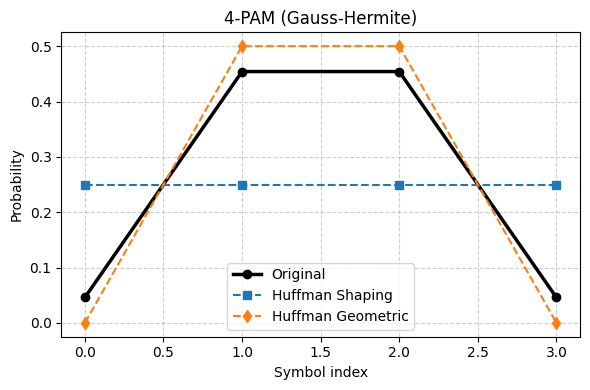

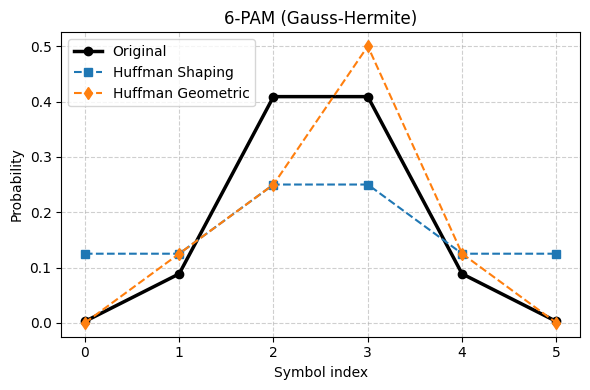

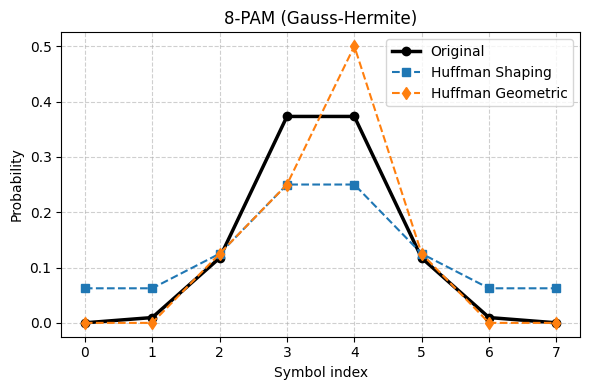

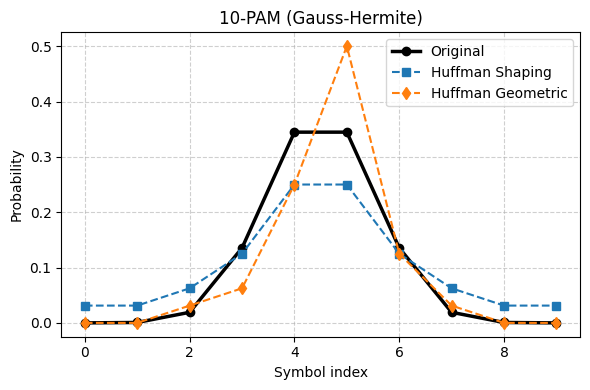

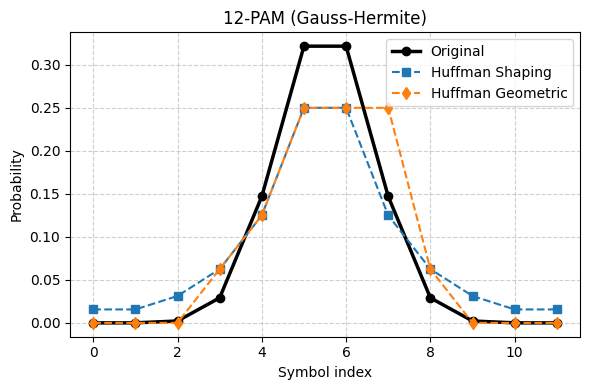

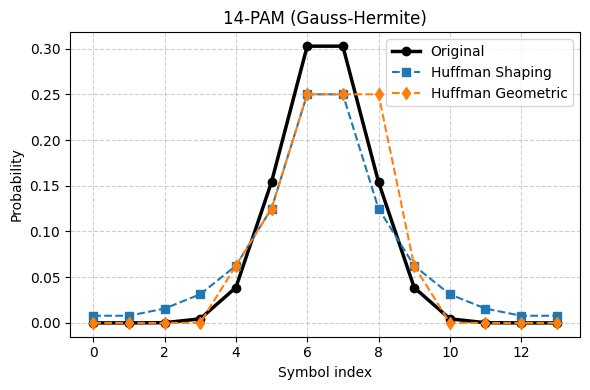

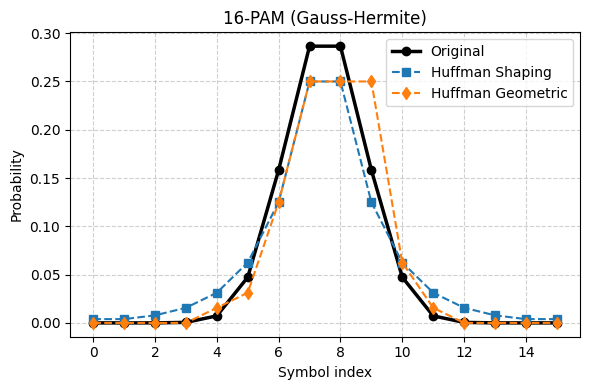

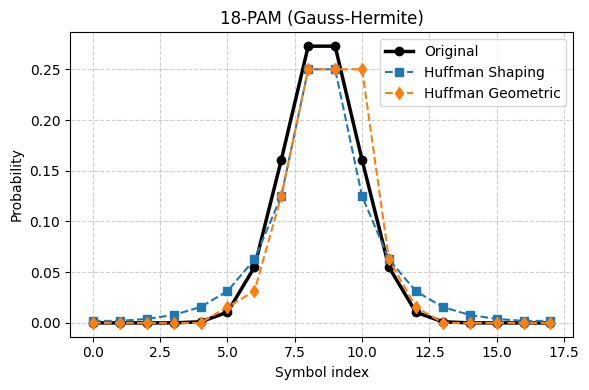

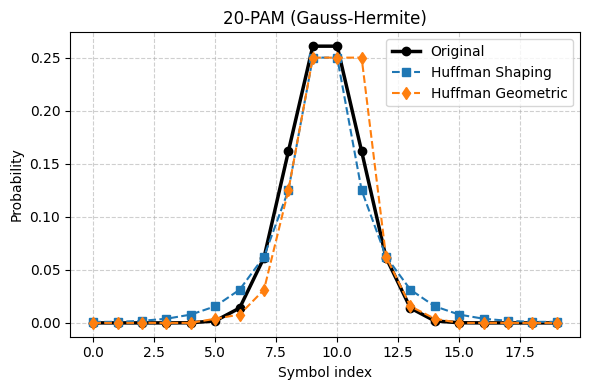

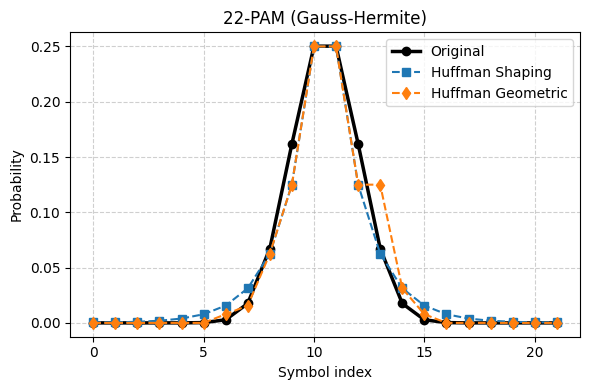

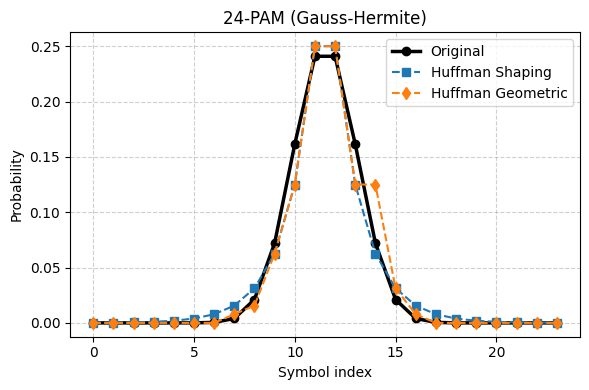

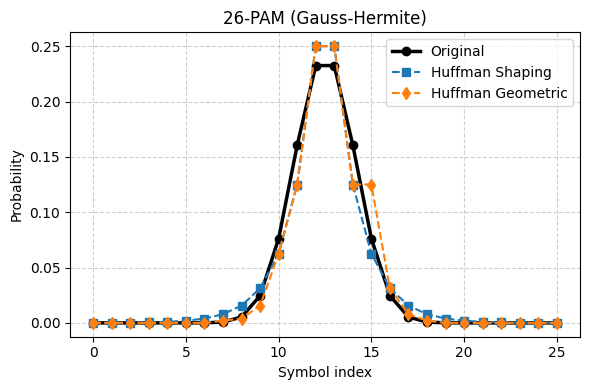

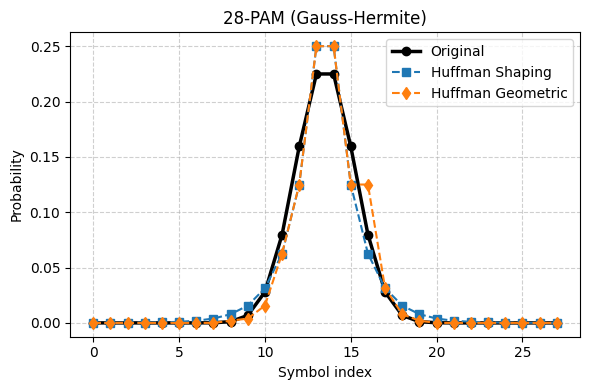

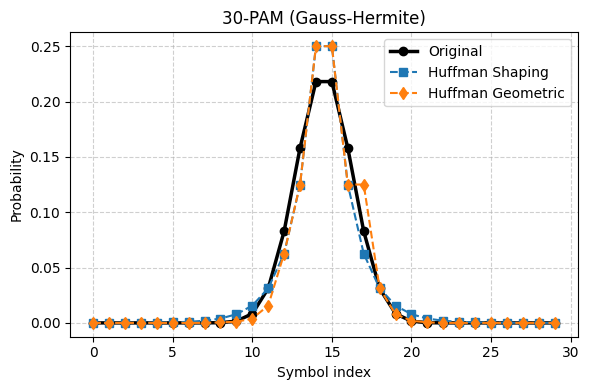

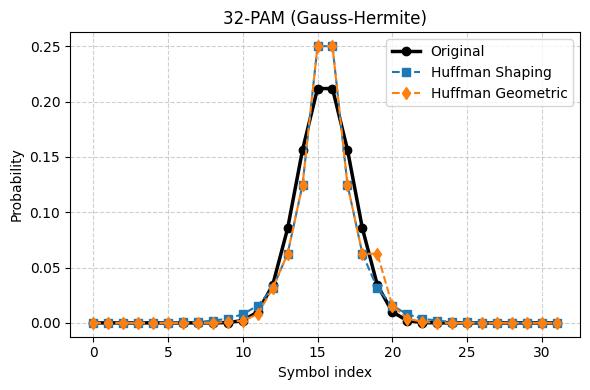

In [7]:
plot_distributions(gausshermite_results, "PAM (Gauss-Hermite)")